In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lending = pd.read_csv("lending.csv") 
lending.head()

,Unnamed: 0,Unnamed: 1,AT&T,Unnamed: 3,Unnamed: 4,Unnamed: 5,T-Mobile,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1. Return on Equity,Template,Q3FY20,2019,2018,2017,Q3FY20,2019,2018,2017
1,Return on equity (ROE),#DIV/0!,5.0%,7.4%,10.3%,21.0%,3.1%,12.0%,11.7%,20.1%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2. Profitability,NaN,Q3FY20,2019,2018,2017,Q3FY20,2019,2018,2017
4,Net profit margin,#DIV/0!,7.7%,8.3%,11.7%,18.6%,4.1%,7.7%,6.7%,11.2%


In [6]:
def get_minmax(att_data, tm_data):
    return [np.minimum(att_data.min(), tm_data.min()), np.maximum(att_data.max(), tm_data.max())] 

In [7]:
debt_to_cash_flow_idx = 23
debt_service_coverage_ratio_idx = 28
quick_ratio_idx = 27

att_lending_cols = [2, 3, 4, 5]
tm_lending_cols = [6, 7, 8, 9]

att_dcf = pd.to_numeric(lending.iloc[debt_to_cash_flow_idx, att_lending_cols]);
att_dscr = pd.to_numeric(lending.iloc[debt_service_coverage_ratio_idx, att_lending_cols]);
att_quick = pd.to_numeric(lending.iloc[quick_ratio_idx, att_lending_cols]);

tm_dcf = pd.to_numeric(lending.iloc[debt_to_cash_flow_idx, tm_lending_cols]);
tm_dscr = pd.to_numeric(lending.iloc[debt_service_coverage_ratio_idx, tm_lending_cols]);
tm_quick = pd.to_numeric(lending.iloc[quick_ratio_idx, tm_lending_cols]);

ylim_dcf = get_minmax(att_dcf, tm_dcf)
ylim_dscr = get_minmax(att_dscr, tm_dscr)
ylim_quick = get_minmax(att_quick, tm_quick)

In [77]:
lending_figsize=(1, 0.5)
directory = "figs/"
def lineplot(data, ylim, axes, color="C{}".format(0)):
    axes.plot(data, color=color, marker=".")
    axes.axis('off');
    axes.set_ylim(ylim)

def barplot(data, ylim, axes, color="C{}".format(0)):
    axes.bar(data.keys(), data, color=color)
    axes.axis('off');
    axes.set_ylim(ylim)    
    
def save_file(fig, title):
    filename = directory + title
    fig.savefig(filename)

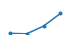

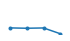

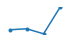

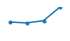

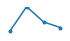

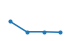

In [78]:
# AT&T Lending Trend Graphs
fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(att_dcf, ylim_dcf, axes)
save_file(fig, 'att_dcf')

fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(att_dscr, ylim_dscr, axes)
save_file(fig, 'att_dscr')

fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(att_quick, ylim_quick, axes)
save_file(fig, 'att_quick')

# T-Mobile Lending Trend Graphs
fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(tm_dcf, ylim_dcf, axes)
save_file(fig, 'tm_dcf')

fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(tm_dscr, ylim_dscr, axes)
save_file(fig, 'tm_dscr')

fig, axes = plt.subplots(1, 1, figsize=lending_figsize)
fig.patch.set_visible(False)
lineplot(tm_quick, ylim_quick, axes)
save_file(fig, 'tm_quick')

In [79]:
ratios = pd.read_csv("ratios.csv", index_col=0) 
ratios.head(10)

,ATT_Q3FY20,ATT_2019,ATT_2018,ATT_2017,TM_Q3FY20,TM_2019,TM_2018,TM_2017
Return on equity (ROE),4.969855e-02,7.415789e-02,1.029121e-01,2.101798e-01,3.092096e-02,1.204627e-01,1.168379e-01,2.010727e-01
EPS,1.272012e+00,1.964965e+00,2.827005e+00,4.595381e+00,2.326721e+00,4.046674e+00,3.397647e+00,5.451923e+00
Current (liquidity) ratio,8.389323e-01,7.946627e-01,7.983080e-01,9.724410e-01,9.810988e-01,7.440429e-01,8.065647e-01,7.742076e-01
Gross profit margin,3.769523e-01,3.798988e-01,3.684029e-01,3.661256e-01,4.059847e-01,4.413752e-01,4.264604e-01,4.165107e-01
FCF,1.976500e+10,2.903300e+10,2.235100e+10,1.760100e+10,-2.061000e+09,4.330000e+08,-1.642000e+09,2.725000e+09
NPV,3.618640e+11,6.690860e+11,5.919480e+11,5.304190e+11,0.000000e+00,1.486501e+10,0.000000e+00,1.085310e+11
P/E,2.241332e+01,1.988839e+01,1.009549e+01,8.301814e+00,4.915071e+01,1.937888e+01,1.861288e+01,1.184903e+01
P/S,1.723459e+00,1.643710e+00,1.179668e+00,1.543385e+00,2.039423e+00,1.493532e+00,1.241145e+00,1.323692e+00
P/FCF,1.099290e+01,1.025828e+01,9.012363e+00,1.407785e+01,-4.755290e+01,1.552100e+02,-3.273691e+01,1.972374e+01
Churn,9.900000e-03,1.180000e-02,1.120000e-02,1.070000e-02,8.500000e-03,8.900000e-03,1.010000e-02,1.180000e-02


In [80]:
# Financial ratio trend charts
att_ratio_cols = ['ATT_Q3FY20', 'ATT_2019', 'ATT_2018', 'ATT_2017']
tm_ratio_cols = ['TM_Q3FY20', 'TM_2019', 'TM_2018', 'TM_2017']
ratio_figsize=(1, 6.5)

indices = [
    'Return on equity (ROE)',
    'EPS',
    'Current (liquidity) ratio',
    'Gross profit margin',
    'FCF',
    'NPV',
    'Skip',
    'P/E',
    'P/S',
    'P/FCF',
    'Skip',    
    'Churn',
    'ARPU',
    'Subscriber growth',
    'Customer satisfaction',
    'Skip',
    'Cash conversion cycle',
    'Beta'
]

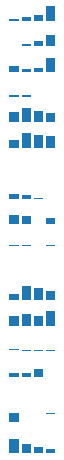

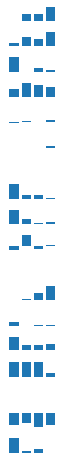

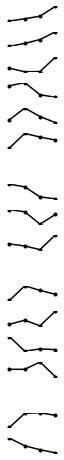

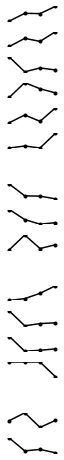

In [81]:
num_subplots = len(indices)
att_ratio_relative_fig, att_ratio_relative_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)
tm_ratio_relative_fig, tm_ratio_relative_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)

att_ratio_absolute_fig, att_ratio_absolute_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)
tm_ratio_absolute_fig, tm_ratio_absolute_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)

att_ratio_relative_fig.patch.set_visible(False)
tm_ratio_relative_fig.patch.set_visible(False)
att_ratio_absolute_fig.patch.set_visible(False)
tm_ratio_absolute_fig.patch.set_visible(False)

for idx, name in enumerate(indices):
    if name == 'Skip':
        att_ratio_relative_axes[idx].remove()
        tm_ratio_relative_axes[idx].remove()
        att_ratio_absolute_axes[idx].remove()
        tm_ratio_absolute_axes[idx].remove()        
    else:
        att_data = pd.to_numeric(ratios.loc[name, att_ratio_cols].iloc[:]);
        tm_data = pd.to_numeric(ratios.loc[name, tm_ratio_cols].iloc[:]);

        att_ylim_absolute = get_minmax(att_data, att_data)
        tm_ylim_absolute = get_minmax(tm_data, tm_data)
        ylim_relative = get_minmax(att_data, tm_data)

        barplot(att_data, ylim_relative, att_ratio_relative_axes[idx])
        barplot(tm_data, ylim_relative, tm_ratio_relative_axes[idx])
        lineplot(att_data, att_ylim_absolute, att_ratio_absolute_axes[idx], 'black')
        lineplot(tm_data, tm_ylim_absolute, tm_ratio_absolute_axes[idx], 'black')

att_ratio_relative_fig.tight_layout()
tm_ratio_relative_fig.tight_layout()
att_ratio_absolute_fig.tight_layout()
tm_ratio_absolute_fig.tight_layout()
        
save_file(att_ratio_relative_fig, 'att_relative_ratios')
save_file(tm_ratio_relative_fig, 'tm_relative_ratios')
save_file(att_ratio_relative_fig, 'att_absolute_ratios')
save_file(tm_ratio_relative_fig, 'tm_absolute_ratios')